In [1]:
%matplotlib inline

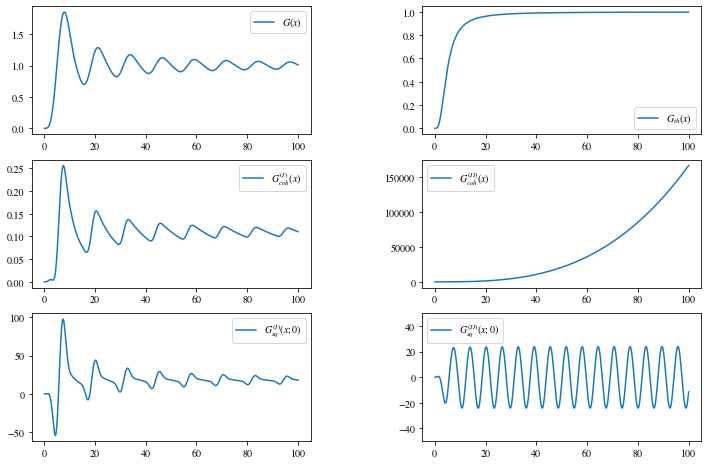

In [2]:
import numpy as np
import pylab
import matplotlib.pyplot as plt
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'

x0 = 0.1
xf = 100.0
dx = 0.001

def G(x):
    G = 1.0+(2.0/(3.0*x))*(np.sin(x)-8.0*np.sin(x/2.0))+(1/(x**2))*((2.0*np.cos(x)/3.0)-(32.0*np.cos(x/2.0)/3.0)+10.0)
    return G
def Gth(x):
    Gth = (1.0/((np.exp(2.0*x)-1.0)**2))*(1.0+16.0*np.exp(x)+26.0*np.exp(2.0*x)+16.0*np.exp(3.0*x)+np.exp(4.0*x))-15/(x**2)
    return Gth
def Gcoh1(x):
    Gcoh1 = (1.0/(1152.0*(x**2)))*(1495.0+126.0*x**2-1728.0*np.cos(x/2.0)+288.0*np.cos(x)-64.0*np.cos(3.0*x/2.0)+9.0*np.cos(2.0*x)+18.0*x*np.sin(2.0*x)-96.0*x*(9*np.sin(x/2)-3*np.sin(x)+np.sin(3.0*x/2.0)))
    return Gcoh1
def Gcoh2(x):
    Gcoh2 = (1.0/(12.0*(x**3)))*(441.0+2.0*x**6+216.0*(x**2-2.0)*np.cos(x)+9.0*(2.0*x**2-1.0)*np.cos(2.0*x)-36.0*x*(12.0-2.0*x**2+np.cos(x))*np.sin(x))
    return Gcoh2
def Gsq1(x):
    Gsq1 = (1.0/(x**2))*(-576.0*np.cos(x/2.0)+216.0*np.cos(x)-64.0*np.cos(3.0*x/2.0)+9.0*np.cos(2.0*x)+18.0*x**2+415.0-288.0*x*np.sin(x/2.0)+216.0*x*np.sin(x)-96.0*x*np.sin(3.0*x/2.0)+18.0*x*np.sin(2.0*x))
    return Gsq1
def Gsq2(x):
    Gsq2 = (1.0/(x**3))*(72.0*(x**2-2.0)*np.cos(x)+(6.0*x**2-3.0)*np.cos(2.0*x)+147.0-144.0*x*np.sin(x)+24.0*(x**3)*np.sin(x)-6.0*x*np.sin(2.0*x))
    return Gsq2

x = np.arange(x0, xf, dx)
y = G(x)
u = Gth(x)
v = Gcoh1(x)
w = Gcoh2(x)
z = Gsq1(x)
r = Gsq2(x)

# Plot
largura = 12  # Largura da figura
altura  =  8  # Altura da figura
pylab.figure(figsize =(largura, altura))     # Define o tamanho do gráfico

numLinhas  = 3  # Definimos o númmero de linhas que terá a matriz de gráficos   
numColunas = 2  # Definimos o númmero de colunas que terá a matriz de gráficos 

# Controla a distância entre os eixos verticamente
# hspace controla a distância entre as linhas
# wspace controla a distância entre as colunas
pylab.subplots_adjust(hspace=0.2, wspace=0.4)

# Primeiro gráfico
pylab.subplot(numLinhas, numColunas, 1)
pylab.plot(x, y, label='$G(x)$')
pylab.legend()

# Segundo gráfico
pylab.subplot(numLinhas, numColunas, 2)
pylab.plot(x, u, label='$G_{th}(x)$')
pylab.legend()

# Terceiro gráfico
pylab.subplot(numLinhas, numColunas, 3)
pylab.plot(x, v, label='$G_{coh}^{(I)}(x)$')
pylab.legend()

# Quarto gráfico
pylab.subplot(numLinhas, numColunas, 4)
pylab.plot(x, w, label='$G_{coh}^{(II)}(x)$')
pylab.legend()

# Quinto gráfico
pylab.subplot(numLinhas, numColunas, 5)
pylab.plot(x, z, label='$G_{sq}^{(I)}(x;0)$')
pylab.legend()

# Sexto gráfico
pylab.subplot(numLinhas, numColunas, 6)
pylab.plot(x, r, label='$G_{sq}^{(II)}(x;0)$')
pylab.ylim([-50,50])
pylab.legend(loc='upper left')

pylab.savefig('Gs.pdf')

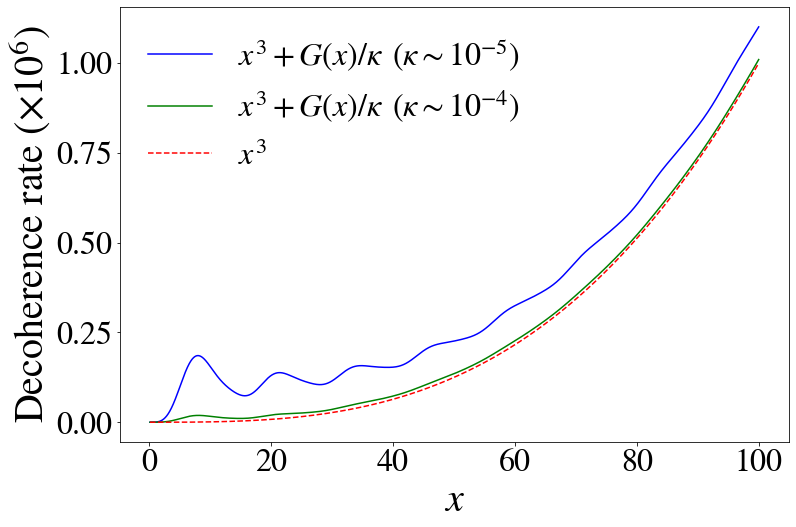

In [61]:
k11 = 1e-5
k12 = 1e-4

y11 = (y/k11)+(x**3)
y12 = (y/k12)+(x**3)
z11 = x**3

# Plot
fig, ax = plt.subplots(figsize=(12, 8))

# Set general font size
plt.rcParams['font.size'] = '32'

# Set tick font size
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
	label.set_fontsize(32)

ax.plot(x, y11/(10**6), '-b', label='$x^3+G(x)/\kappa\,\,\,(\kappa\sim 10^{-5})$')
ax.plot(x, y12/(10**6), '-g', label='$x^3+G(x)/\kappa\,\,\,(\kappa\sim 10^{-4})$')
ax.plot(x, z11/(10**6), '--r', label='$x^3$')
plt.legend(frameon = False)
plt.xlabel('$x$',fontsize=40)
plt.ylabel(r'Decoherence rate ($\times 10^6$)',fontsize=40)

plt.savefig('vac.pdf', bbox_inches="tight")

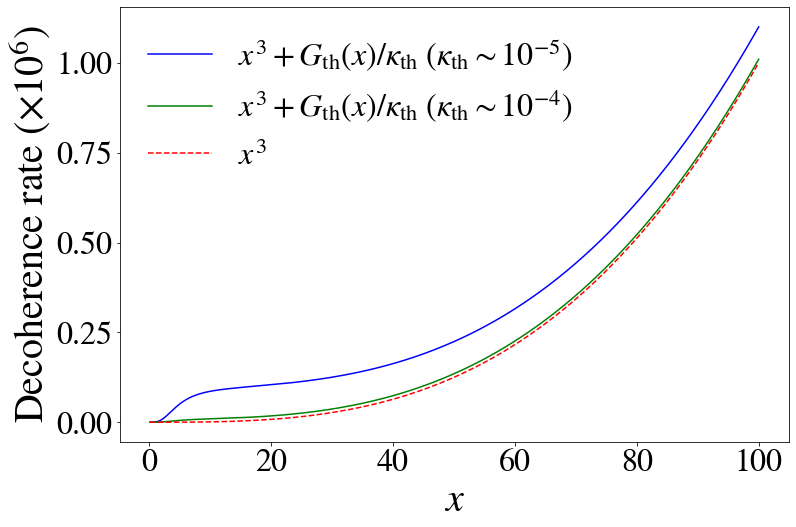

In [62]:
k21 = 1e-5
k22 = 1e-4

y21 = (u/k21)+(x**3)
y22 = (u/k22)+(x**3)
z21 = x**3

# Plot
fig, ax = plt.subplots(figsize=(12, 8))

# Set general font size
plt.rcParams['font.size'] = '32'

# Set tick font size
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
	label.set_fontsize(32)

ax.plot(x, y21/(10**6), '-b', label='$x^3+G_{\mathrm{th}}(x)/\kappa_{\mathrm{th}}\,\,(\kappa_{\mathrm{th}}\sim 10^{-5})$')
ax.plot(x, y22/(10**6), '-g', label='$x^3+G_{\mathrm{th}}(x)/\kappa_{\mathrm{th}}\,\,(\kappa_{\mathrm{th}}\sim 10^{-4})$')
ax.plot(x, z21/(10**6), '--r', label='$x^3$')
plt.legend(frameon = False)
plt.xlabel('$x$',fontsize=40)
plt.ylabel(r'Decoherence rate ($\times 10^6$)',fontsize=40)

plt.savefig('th.pdf', bbox_inches="tight")

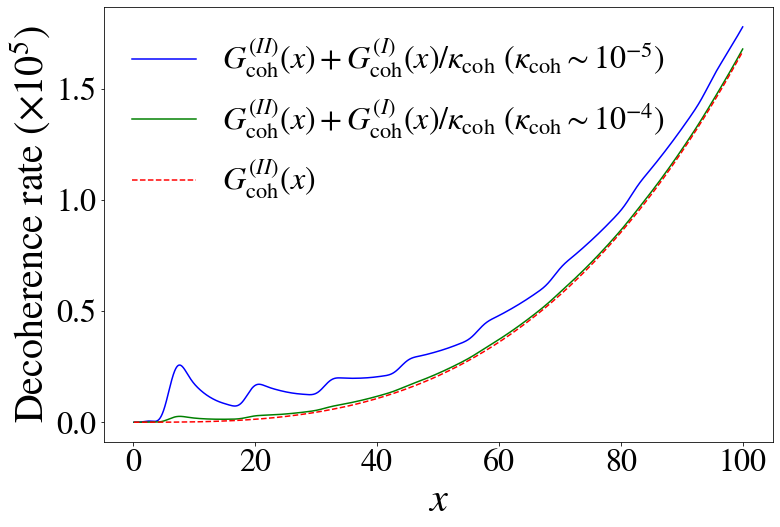

In [63]:
k31 = 1e-5
k32 = 1e-4

y31 = (v/k31)+w
y32 = (v/k32)+w
z31 = w

# Plot
fig, ax = plt.subplots(figsize=(12, 8))

# Set general font size
plt.rcParams['font.size'] = '32'

# Set tick font size
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
	label.set_fontsize(32)

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

ax.plot(x, y31/(10**5), '-b', label='$G_{\mathrm{coh}}^{(II)}(x)+G_{\mathrm{coh}}^{(I)}(x)/\kappa_{\mathrm{coh}}\,\,(\kappa_{\mathrm{coh}}\sim 10^{-5})$')
ax.plot(x, y32/(10**5), '-g', label='$G_{\mathrm{coh}}^{(II)}(x)+G_{\mathrm{coh}}^{(I)}(x)/\kappa_{\mathrm{coh}}\,\,(\kappa_{\mathrm{coh}}\sim 10^{-4})$')
ax.plot(x, z31/(10**5), '--r', label='$G_{\mathrm{coh}}^{(II)}(x)$')
plt.legend(frameon = False)
plt.xlabel('$x$',fontsize=40)
plt.ylabel(r'Decoherence rate ($\times 10^5$)',fontsize=40)

plt.savefig('coh.pdf', bbox_inches="tight")

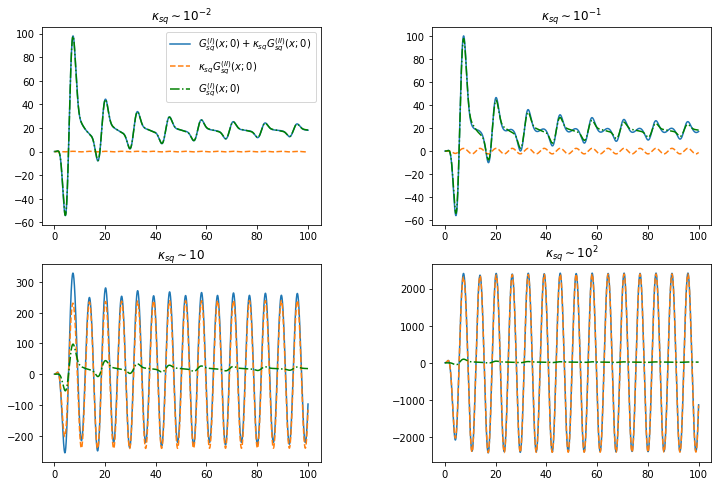

In [13]:
k41 = 1e-2
k42 = 1e-1
k43 = 1e+1
k44 = 1e+2

w4 = z
y41 = z+k41*r
z41 = k41*r
y42 = z+k42*r
z42 = k42*r
y43 = z+k43*r
z43 = k43*r
y44 = z+k44*r
z44 = k44*r

# Plot
largura = 12  # Largura da figura
altura  =  8  # Altura da figura
pylab.figure(figsize =(largura, altura))     # Define o tamanho do gráfico

numLinhas  = 2  # Definimos o númmero de linhas que terá a matriz de gráficos   
numColunas = 2  # Definimos o númmero de colunas que terá a matriz de gráficos 

# Controla a distância entre os eixos verticamente
# hspace controla a distância entre as linhas
# wspace controla a distância entre as colunas
pylab.subplots_adjust(hspace=0.2, wspace=0.4)

# Primeiro gráfico
pylab.subplot(numLinhas, numColunas, 1)
pylab.title('$\kappa_{sq}\sim 10^{-2}$')
pylab.plot(x, y41, label='$G_{sq}^{(I)}(x;0)+\kappa_{sq} G_{sq}^{(II)}(x;0)$')
pylab.plot(x, z41, '--', label='$\kappa_{sq} G_{sq}^{(II)}(x;0)$')
pylab.plot(x, w4, '-.g', label='$G_{sq}^{(I)}(x;0)$')
pylab.legend()

# Segundo gráfico
pylab.subplot(numLinhas, numColunas, 2)
pylab.title('$\kappa_{sq}\sim 10^{-1}$')
pylab.plot(x, y42, label='$G_{sq}^{(I)}(x;0)+\kappa_{sq} G_{sq}^{(II)}(x;0)$')
pylab.plot(x, z42, '--', label='$\kappa_{sq} G_{sq}^{(II)}(x;0)$')
pylab.plot(x, w4, '-.g', label='$G_{sq}^{(I)}(x;0)$')
#pylab.legend()

# Terceiro gráfico
pylab.subplot(numLinhas, numColunas, 3)
pylab.title('$\kappa_{sq}\sim 10$')
pylab.plot(x, y43, label='$G_{sq}^{(I)}(x;0)+\kappa_{sq} G_{sq}^{(II)}(x;0)$')
pylab.plot(x, z43, '--', label='$\kappa_{sq} G_{sq}^{(II)}(x;0)$')
pylab.plot(x, w4, '-.g', label='$G_{sq}^{(I)}(x;0)$')
#pylab.ylim([-1000,1000])
#pylab.legend(loc='upper right',prop={'size':9})

# Quarto gráfico
pylab.subplot(numLinhas, numColunas, 4)
pylab.title('$\kappa_{sq}\sim 10^{2}$')
pylab.plot(x, y44, label='$G_{sq}^{(I)}(x;0)+\kappa_{sq} G_{sq}^{(II)}(x;0)$')
pylab.plot(x, z44, '--', label='$\kappa_{sq} G_{sq}^{(II)}(x;0)$')
pylab.plot(x, w4, '-.g', label='$G_{sq}^{(I)}(x;0)$')
#pylab.legend()

pylab.savefig('sq.pdf')

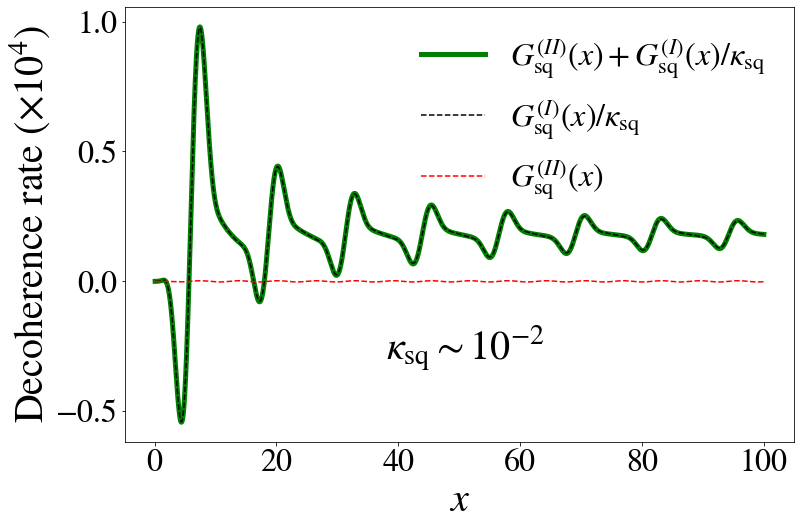

In [64]:
from matplotlib.backends.backend_pdf import PdfPages

k41 = 1e-2
k42 = 1e+1

w41 = z/k41
y41 = (z/k41)+r
w42 = z/k42
y42 = (z/k42)+r
z41 = r

# Plot
fig1, ax = plt.subplots(figsize=(12, 8))

# Set general font size
plt.rcParams['font.size'] = '32'

# Set tick font size
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
	label.set_fontsize(32)

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

#ax.set_title('$\kappa_{\mathrm{sq}}\sim 10^{-2}$', y=1.0, pad=-14)

#plt.title('$\kappa_{\mathrm{sq}}\sim 10^{-2}$')
ax.plot(x, y41/(10**4), '-g', linewidth=5.0, label='$G_{\mathrm{sq}}^{(II)}(x)+G_{\mathrm{sq}}^{(I)}(x)/\kappa_{\mathrm{sq}}$')
ax.plot(x, w41/(10**4), '--k', label='$G_{\mathrm{sq}}^{(I)}(x)/\kappa_{\mathrm{sq}}$')
ax.plot(x, z41/(10**4), '--r', label='$G_{\mathrm{sq}}^{(II)}(x)$')
plt.legend(frameon = False)
plt.xlabel('$x$',fontsize=40)
plt.ylabel(r'Decoherence rate ($\times 10^4$)',fontsize=40)
ax.text(38, -0.3, r'$\kappa_{\mathrm{sq}}\sim 10^{-2}$', fontsize=40)

plt.savefig('sq-2.pdf', bbox_inches="tight")

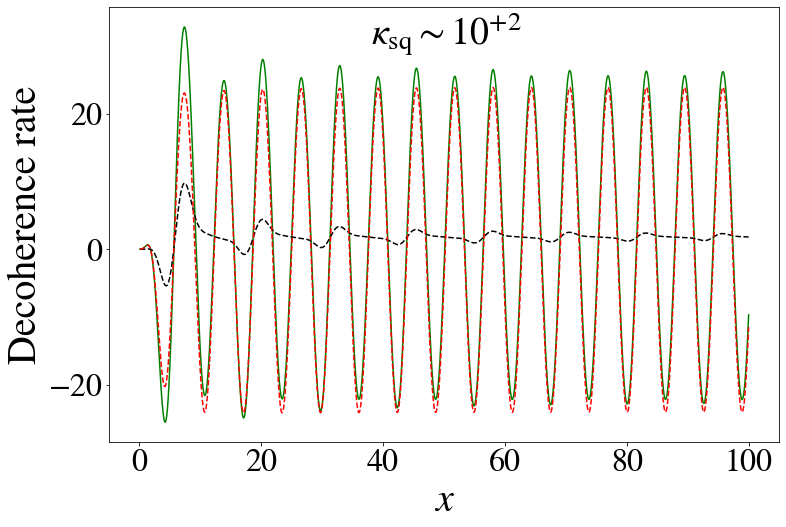

In [65]:
# Plot
fig, ax = plt.subplots(figsize=(12, 8))

# Set general font size
plt.rcParams['font.size'] = '32'

# Set tick font size
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
	label.set_fontsize(32)

#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

#plt.title('$\kappa_{\mathrm{sq}}\sim 10^{+2}$')
ax.plot(x, y42, '-g', label='$G_{\mathrm{sq}}^{(II)}(x)+G_{\mathrm{sq}}^{(I)}(x)/\kappa_{\mathrm{sq}}$')
ax.plot(x, w42, '--k', label='$G_{\mathrm{sq}}^{(I)}(x)/\kappa_{\mathrm{sq}}$')
ax.plot(x, z41, '--r', label='$G_{\mathrm{sq}}^{(II)}(x)$')
#plt.legend(frameon = False, bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.xlabel('$x$',fontsize=40)
plt.ylabel('Decoherence rate',fontsize=40)
ax.text(38, 30, r'$\kappa_{\mathrm{sq}}\sim 10^{+2}$',fontsize=38)

plt.savefig('sq+2.pdf', bbox_inches="tight")